In [96]:
import numpy as np
import pandas as pd


In [97]:
np.random.seed(23)

In [98]:
mu_vec1=np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [99]:
df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1


In [100]:
df4=df

In [101]:
df

,feature1,feature2,feature3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1
5,-1.009942,0.441736,1.128877,1
6,-1.838068,-0.938769,-0.201841,1
7,1.045371,0.538162,0.812119,1
8,0.241106,-0.952510,-0.136267,1
9,1.267248,0.173634,-1.223255,1


In [102]:
mu_vec2= np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)



In [103]:
df2=pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

In [104]:
df2['target']=0

In [105]:
df=pd.concat([df,df2])

In [108]:
df=df.sample(40)

In [109]:
df4=df

In [35]:
# !pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 5.6 MB/s eta 0:00:04
   --------- ------------------------------ 4.5/19.1 MB 19.2 MB/s eta 0:00:01
   ------------------------ --------------- 11.5/19.1 MB 24.0 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.1 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 21.5 MB/s eta 0:00:00


In [56]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()
     


In [54]:
import plotly.io as pio
pio.renderers.default = 'browser'  # Opens the plot in your default web browser


In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [60]:
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [65]:
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])

In [66]:
print(covariance_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [67]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [68]:
eigen_values


array([1.3536065 , 0.94557084, 0.77774573])

In [69]:

eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

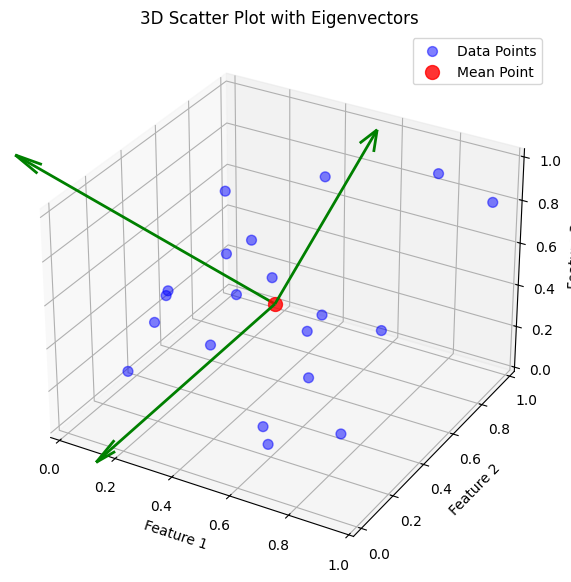

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Generate sample data
np.random.seed(42)
df = pd.DataFrame(np.random.rand(20, 3), columns=['feature1', 'feature2', 'feature3'])

# Compute the mean and eigenvectors
mean_point = df.mean().values
cov_matrix = np.cov(df.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], s=50, color='blue', alpha=0.5, label='Data Points')

# Mark the mean point
ax.scatter(*mean_point, s=100, color='red', alpha=0.8, label='Mean Point')

# Plot eigenvectors as arrows
for v in eigen_vectors.T:
    start = mean_point
    end = mean_point + v  # Scale can be adjusted if needed
    ax.quiver(start[0], start[1], start[2], 
              end[0] - start[0], end[1] - start[1], end[2] - start[2], 
              color='green', linewidth=2, arrow_length_ratio=0.1)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot with Eigenvectors')
plt.legend()

# Show the plot
plt.show()


In [73]:

pc = eigen_vectors[0:2]
pc

array([[-0.93400599,  0.35707133, -0.01152725],
       [-0.00106422, -0.03504663, -0.99938511]])

In [110]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df4['target'].values
new_df.head()

,PC1,PC2,target
0,0.026686,-1.012733,0
1,1.255374,-1.601923,0
2,0.212994,-1.261775,0
3,0.415193,0.057546,1
4,0.015055,-0.935816,1


In [111]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()